<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [86]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



In [3]:
# проверим данные на наличие пустых значений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
# найдем стат показатели для CRIM (уровень преступности)

print('max =' , data.CRIM.max())
print('min =', data.CRIM.min())
print('разброс =', data.CRIM.max()-data.CRIM.min())
print('среднее =', statistics.mean(data['CRIM']) )
#print('мода =', statistics.mode(data['CRIM']) )
print('медиана =', statistics.median(data['CRIM']) )
print('станд. отклон =', statistics.pstdev(data['CRIM']) )
print('дисперсия =', statistics.pvariance(data['CRIM']) )

max = 88.9762
min = 0.00632
разброс = 88.96988
среднее = 3.613523557312253
медиана = 0.25651
станд. отклон = 8.59304135129577
дисперсия = 73.84035966507905


In [5]:
len(data['CRIM'].unique())

504

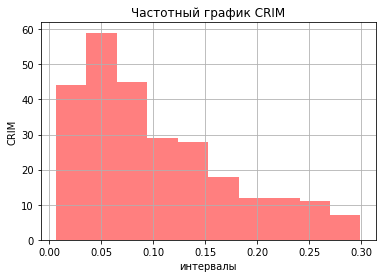

In [19]:
# построим частотный график для CRIM

plt.hist(data.CRIM[data.CRIM < 0.3], bins = 10, color ='red', alpha=0.5)
plt.xlabel('интервалы')
plt.ylabel('CRIM')
plt.title('Частотный график CRIM')
plt.grid(True)
plt.show()

# получается, что CRIM - это непрерывное распределение, логнормальное 

In [7]:
# найдем стат показатели для ZN (доля жилой земли для городов более 25 тыс.кв.фт)

print('max =' , data.ZN.max())
print('min =', data.ZN.min())
print('разброс =', data.ZN.max()-data.ZN.min())
print('среднее =', statistics.mean(data['ZN']) )
print('мода =', statistics.mode(data['ZN']) )
print('медиана =', statistics.median(data['ZN']) )
print('станд. отклон =', statistics.pstdev(data['ZN']) )
print('дисперсия =', statistics.pvariance(data['ZN']) )

max = 100.0
min = 0.0
разброс = 100.0
среднее = 11.363636363636363
мода = 0.0
медиана = 0.0
станд. отклон = 23.29939569476613
дисперсия = 542.8618397412864


In [8]:
len(data['ZN'].unique())

26

In [34]:
# найдем стат показатели для ZN, если без нулей

a = data.ZN[data.ZN != 0]
print('max =' , a.max())
print('min =', a.min())
print('разброс =', a.max()-a.min())
print('среднее =', statistics.mean(a) )
print('мода =', statistics.mode(a) )
print('медиана =', statistics.median(a) )
print('станд. отклон =', statistics.pstdev(a) )
print('дисперсия =', statistics.pvariance(a) )

max = 100.0
min = 12.5
разброс = 87.5
среднее = 42.91044776119403
мода = 20.0
медиана = 33.0
станд. отклон = 26.386044108204377
дисперсия = 696.2233236801069


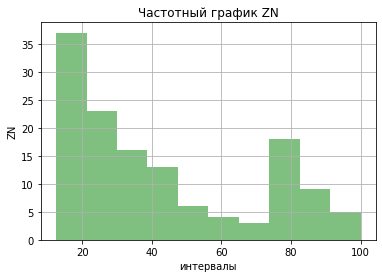

In [44]:
# построим частотный график для ZN 
# Если учесть, что этот столбец показывает долю только для городов с площадью более 25 тыс. кв. фт., то правильнее было бы выкинуть из анализа города с площадью менее 25 тыс. кв. фт, следовательно все нули.

plt.hist(data.ZN[data.ZN != 0], bins = 10, color ='g', alpha=0.5)
plt.xlabel('интервалы')
plt.ylabel('ZN')
plt.title('Частотный график ZN')
plt.grid(True)
plt.show()

# получается, что ZN - это непрерывное распределение. Не знаю, какое это распределение по типу. Данные разбросаны по интервалам.
# Даже, если я сокращу кол-во bins, то все равно получается 2 верхушки у распределения.
# Подскажите, пожалуйста, какое это распределение?

In [10]:
# найдем стат показатели для INDUS (доля не торговых площадей в городе)

print('max =' , data.INDUS.max())
print('min =', data.INDUS.min())
print('разброс =', data.INDUS.max()-data.INDUS.min())
print('среднее =', statistics.mean(data['INDUS']) )
print('мода =', statistics.mode(data['INDUS']) )
print('медиана =', statistics.median(data['INDUS']) )
print('станд. отклон =', statistics.pstdev(data['INDUS']) )
print('дисперсия =', statistics.pvariance(data['INDUS']) )

max = 27.74
min = 0.46
разброс = 27.279999999999998
среднее = 11.136778656126483
мода = 18.1
медиана = 9.69
станд. отклон = 6.853570583390874
дисперсия = 46.97142974152072


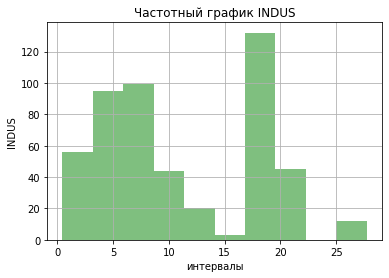

In [37]:
# построим частотный график для INDUS 

plt.hist(data['INDUS'], bins = 10, color ='g', alpha=0.5)
plt.xlabel('интервалы')
plt.ylabel('INDUS')
plt.title('Частотный график INDUS')
plt.grid(True)
plt.show()

# получается, что INDUS - это непрерывное распределение
# как и с ZN, тут 2 верхушки у распределения.   

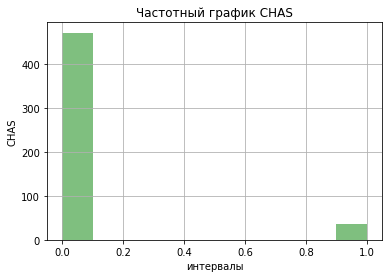

In [39]:
# найдем стат показатели для CHAS (ограничивает ли река город, 1 - да, 0 - нет)
# это дискретное распределение
# построим частотный график для CHAS 

plt.hist(data['CHAS'], bins = 10, color ='g', alpha=0.5)
plt.xlabel('интервалы')
plt.ylabel('CHAS')
plt.title('Частотный график CHAS')
plt.grid(True)
plt.show()

# Это дискретное распределение, распределение Бернулли

In [40]:
# найдем стат показатели для NOX (концентрация азота на 10 млн.)

print('max =' , data.NOX.max())
print('min =', data.NOX.min())
print('разброс =', data.NOX.max()-data.NOX.min())
print('среднее =', statistics.mean(data['NOX']) )
print('мода =', statistics.mode(data['NOX']) )
print('медиана =', statistics.median(data['NOX']) )
print('станд. отклон =', statistics.pstdev(data['NOX']) )
print('дисперсия =', statistics.pvariance(data['NOX']) )

max = 0.871
min = 0.385
разброс = 0.486
среднее = 0.5546950592885376
мода = 0.538
медиана = 0.538
станд. отклон = 0.11576311540656137
дисперсия = 0.013401098888632846


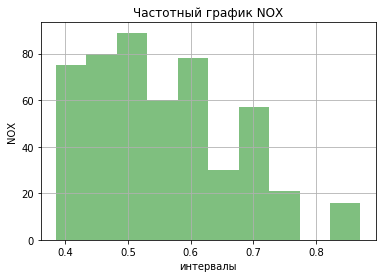

In [67]:
# построим частотный график для NOX 

plt.hist(data.NOX, bins = 10, color ='g', alpha=0.5)
plt.xlabel('интервалы')
plt.ylabel('NOX')
plt.title('Частотный график NOX')
plt.grid(True)
plt.show()

# получается, что NOX - это непрерывное распределение, похоже на нормальное смещенное.


In [81]:
# найдем стат показатели для RM (среднее кол-во комнат на дом)

print('max =' , data.RM.max())
print('min =', data.RM.min())
print('разброс =', data.RM.max()-data.RM.min())
print('среднее =', statistics.mean(data['RM']) )
#print('мода =', statistics.mode(data['RM']) )
print('медиана =', statistics.median(data['RM']) )
print('станд. отклон =', statistics.pstdev(data['RM']) )
print('дисперсия =', statistics.pvariance(data['RM']) )

# моду не считате, т.к. все элементы уникальны и имеется 6 равнораспространенных значений

print('уникальные значения', len(data['RM'].unique()))
print('значения', len(data['RM']))

max = 8.78
min = 3.561
разброс = 5.218999999999999
среднее = 6.284634387351779
медиана = 6.2085
станд. отклон = 0.7019225143345689
дисперсия = 0.492695216129763
уникальные значения 446
значения 506


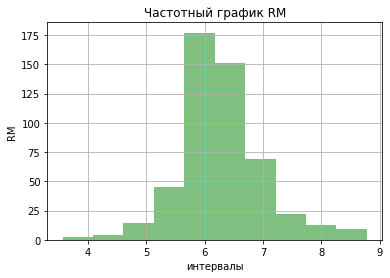

In [79]:
# построим частотный график для RM 

plt.hist(data.RM, bins = 10, color ='g', alpha=0.5)
plt.xlabel('интервалы')
plt.ylabel('RM')
plt.title('Частотный график RM')
plt.grid(True)
plt.show()

# получается, что RM - это непрерывное распределение, нормальное.


In [82]:
# найдем стат показатели для AGE (доля домов с жильцами, построенных до 1940 г. )

print('max =' , data.AGE.max())
print('min =', data.AGE.min())
print('разброс =', data.AGE.max()-data.AGE.min())
print('среднее =', statistics.mean(data['AGE']) )
print('мода =', statistics.mode(data['AGE']) )
print('медиана =', statistics.median(data['AGE']) )
print('станд. отклон =', statistics.pstdev(data['AGE']) )
print('дисперсия =', statistics.pvariance(data['AGE']) )


max = 100.0
min = 2.9
разброс = 97.1
среднее = 68.57490118577076
мода = 100.0
медиана = 77.5
станд. отклон = 28.121032570236867
дисперсия = 790.7924728163227


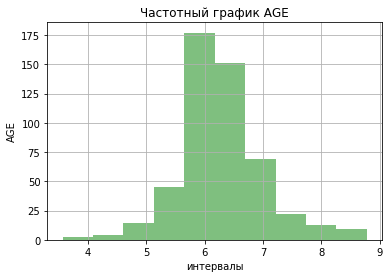

In [83]:
# построим частотный график для AGE 

plt.hist(data.RM, bins = 10, color ='g', alpha=0.5)
plt.xlabel('интервалы')
plt.ylabel('AGE')
plt.title('Частотный график AGE')
plt.grid(True)
plt.show()

# получается, что AGE - это непрерывное распределение, нормальное.


In [84]:
# найдем стат показатели для DIS (взвешенные расстояния до Бостонских центров занятости )

print('max =' , data.DIS.max())
print('min =', data.DIS.min())
print('разброс =', data.DIS.max()-data.DIS.min())
print('среднее =', statistics.mean(data['DIS']) )
print('мода =', statistics.mode(data['DIS']) )
print('медиана =', statistics.median(data['DIS']) )
print('станд. отклон =', statistics.pstdev(data['DIS']) )
print('дисперсия =', statistics.pvariance(data['DIS']) )

max = 12.1265
min = 1.1296
разброс = 10.9969
среднее = 3.7950426877470353
мода = 3.4952
медиана = 3.2074499999999997
станд. отклон = 2.1036283563444593
дисперсия = 4.4252522616164915


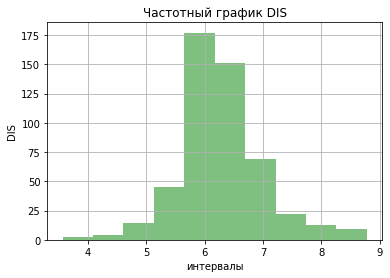

In [93]:
# построим частотный график для DIS 

plt.hist(data.RM, bins = 10, color ='g', alpha=0.5)
plt.xlabel('интервалы')
plt.ylabel('DIS')
plt.title('Частотный график DIS')
plt.grid(True)
plt.show()

# получается, что DIS - это непрерывное распределение, нормальное.

In [88]:
# найдем стат показатели для RAD (доступность радиальных магистралей)

print('max =' , data.RAD.max())
print('min =', data.RAD.min())
print('разброс =', data.RAD.max()-data.RAD.min())
print('среднее =', statistics.mean(data['RAD']) )
print('мода =', statistics.mode(data['RAD']) )
print('медиана =', statistics.median(data['RAD']) )
print('станд. отклон =', statistics.pstdev(data['RAD']) )
print('дисперсия =', statistics.pvariance(data['RAD']) )

max = 24
min = 1
разброс = 23
среднее = 9.549407114624506
мода = 24
медиана = 5.0
станд. отклон = 8.698651117790636
дисперсия = 75.66653126904029


In [90]:
data.RAD.unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

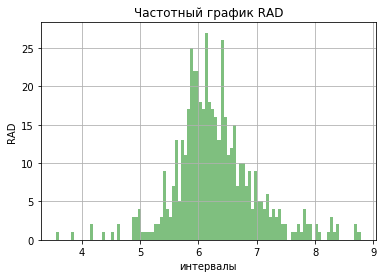

In [91]:
# построим частотный график для RAD 

plt.hist(data.RM, bins = 100, color ='g', alpha=0.5)
plt.xlabel('интервалы')
plt.ylabel('RAD')
plt.title('Частотный график RAD')
plt.grid(True)
plt.show()

# получается, что RAD - это похоже на дискретное распределение,т.к. варианты выпадения значений ограничены.
# Непонятно, какое это распределение, вероятно, мы его еще не проходили.

In [94]:
# найдем стат показатели для TAX (налог на имущество на 10 000 долл.)

print('max =' , data.TAX.max())
print('min =', data.TAX.min())
print('разброс =', data.TAX.max()-data.TAX.min())
print('среднее =', statistics.mean(data['TAX']) )
print('мода =', statistics.mode(data['TAX']) )
print('медиана =', statistics.median(data['TAX']) )
print('станд. отклон =', statistics.pstdev(data['TAX']) )
print('дисперсия =', statistics.pvariance(data['TAX']) )

max = 711.0
min = 187.0
разброс = 524.0
среднее = 408.2371541501976
мода = 666.0
медиана = 330.0
станд. отклон = 168.37049503938118
дисперсия = 28348.62359980628


In [95]:
data.TAX.unique()

array([296., 242., 222., 311., 307., 279., 252., 233., 243., 469., 226.,
       313., 256., 284., 216., 337., 345., 305., 398., 281., 247., 270.,
       276., 384., 432., 188., 437., 403., 193., 265., 255., 329., 402.,
       348., 224., 277., 300., 330., 315., 244., 264., 223., 254., 198.,
       285., 241., 293., 245., 289., 358., 304., 287., 430., 422., 370.,
       352., 351., 280., 335., 411., 187., 334., 666., 711., 391., 273.])

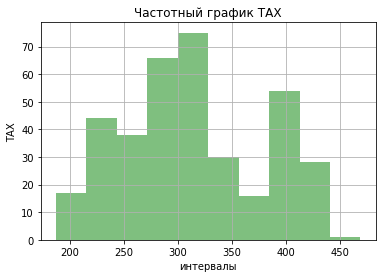

In [103]:
# построим частотный график для TAX 

plt.hist(data.TAX[data.TAX < 600], bins = 10, color ='g', alpha=0.5)
plt.xlabel('интервалы')
plt.ylabel('TAX')
plt.title('Частотный график TAX')
plt.grid(True)
plt.show()

# получается, что RAD - это непрерывное распределение. Если исключить налоги, превышающие 600 долл., то похоже на нормальное распределение.

In [104]:
# найдем стат показатели для PTRATIO (доля учителей по городам)

print('max =' , data.PTRATIO.max())
print('min =', data.PTRATIO.min())
print('разброс =', data.PTRATIO.max()-data.PTRATIO.min())
print('среднее =', statistics.mean(data['PTRATIO']) )
print('мода =', statistics.mode(data['PTRATIO']) )
print('медиана =', statistics.median(data['PTRATIO']) )
print('станд. отклон =', statistics.pstdev(data['PTRATIO']) )
print('дисперсия =', statistics.pvariance(data['PTRATIO']) )

max = 22.0
min = 12.6
разброс = 9.4
среднее = 18.455533596837945
мода = 20.2
медиана = 19.05
станд. отклон = 2.162805191482137
дисперсия = 4.677726296302082


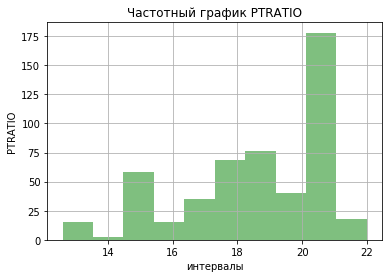

In [107]:
# построим частотный график для PTRATIO 

plt.hist(data.PTRATIO, bins = 10, color ='g', alpha=0.5)
plt.xlabel('интервалы')
plt.ylabel('PTRATIO')
plt.title('Частотный график PTRATIO')
plt.grid(True)
plt.show()

# это непрерывное распределение, нормальное смещенное 

In [108]:
# найдем стат показатели для B (доля афроамериканцев на 1000 чел)

print('max =' , data.B.max())
print('min =', data.B.min())
print('разброс =', data.B.max()-data.B.min())
print('среднее =', statistics.mean(data['B']) )
print('мода =', statistics.mode(data['B']) )
print('медиана =', statistics.median(data['B']) )
print('станд. отклон =', statistics.pstdev(data['B']) )
print('дисперсия =', statistics.pvariance(data['B']) )

max = 396.9
min = 0.32
разброс = 396.58
среднее = 356.67403162055336
мода = 396.9
медиана = 391.44
станд. отклон = 91.20460745217277
дисперсия = 8318.280420504929


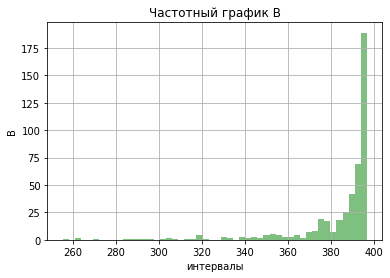

In [116]:
# построим частотный график для B  

plt.hist(data.B[data.B > 250], bins = 50, color ='g', alpha=0.5)
plt.xlabel('интервалы')
plt.ylabel('B')
plt.title('Частотный график B')
plt.grid(True)
plt.show()

#  Это непрерывное распределение. Похоже на экспоненциальное, только повернуто в другую сторону.

In [125]:
# найдем стат показатели для LSTAT (% населения с низким статусом)

print('max =' , data.LSTAT.max())
print('min =', data.LSTAT.min())
print('разброс =', data.LSTAT.max()-data.LSTAT.min())
print('среднее =', statistics.mean(data['LSTAT']) )
#print('мода =', statistics.mode(data['LSTAT']) )
print('медиана =', statistics.median(data['LSTAT']) )
print('станд. отклон =', statistics.pstdev(data['LSTAT']) )
print('дисперсия =', statistics.pvariance(data['LSTAT']) )

# мода не считается, т.к. найдено 5 значений с одинаковым количеством, остальные - уникальны

max = 37.97
min = 1.73
разброс = 36.24
среднее = 12.65306324110672
медиана = 11.36
станд. отклон = 7.134001636650484
дисперсия = 50.89397935173179


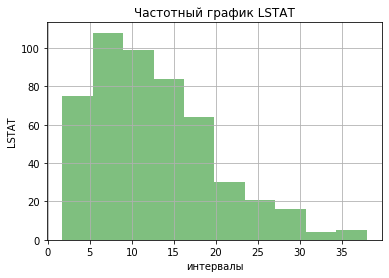

In [126]:
# построим частотный график для LSTAT  

plt.hist(data.LSTAT, bins = 10, color ='g', alpha=0.5)
plt.xlabel('интервалы')
plt.ylabel('LSTAT')
plt.title('Частотный график LSTAT')
plt.grid(True)
plt.show()

# это непрерывное распределение, похоже на нормальное

In [127]:
# найдем стат показатели для MEDV (средняя стоимость жилых домов в 1000 долл.)

print('max =' , data.MEDV.max())
print('min =', data.MEDV.min())
print('разброс =', data.MEDV.max()-data.MEDV.min())
print('среднее =', statistics.mean(data['MEDV']) )
print('мода =', statistics.mode(data['MEDV']) )
print('медиана =', statistics.median(data['MEDV']) )
print('станд. отклон =', statistics.pstdev(data['MEDV']) )
print('дисперсия =', statistics.pvariance(data['MEDV']) )

max = 50.0
min = 5.0
разброс = 45.0
среднее = 22.532806324110673
мода = 50.0
медиана = 21.2
станд. отклон = 9.188011545278203
дисперсия = 84.41955615616554


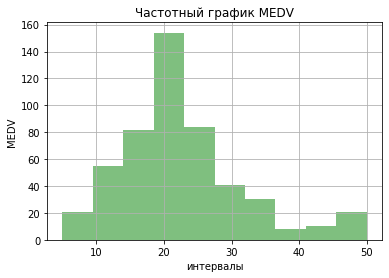

In [128]:
# построим частотный график для MEDV  

plt.hist(data.MEDV, bins = 10, color ='g', alpha=0.5)
plt.xlabel('интервалы')
plt.ylabel('MEDV')
plt.title('Частотный график MEDV')
plt.grid(True)
plt.show()

# это непрерывное распределение, похоже на нормальное

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

In [ ]:
# Получилась самая сильная отрицательная корреляция с  LSTAT = -74%. Т.е. с увеличение одного показателя, другой снижается.
# Чем выше цены на дома, тем меньше доля населения с низким статусом.

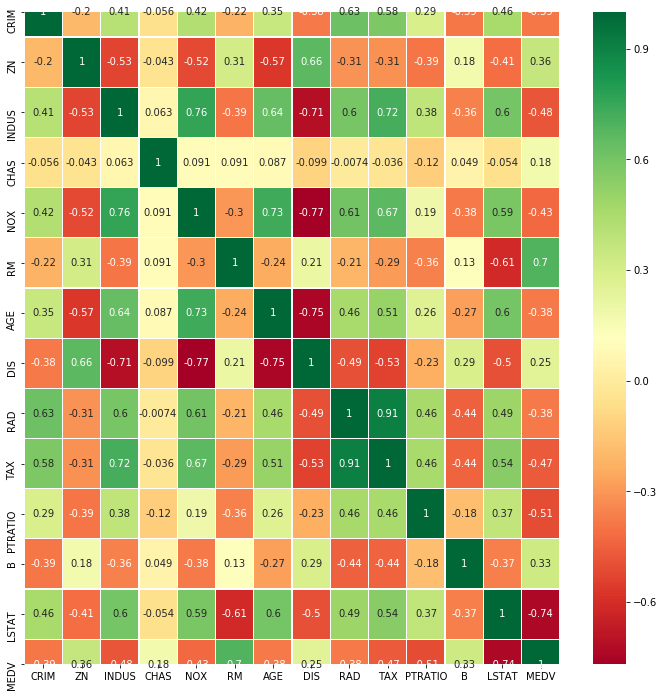

In [145]:
fig = plt.gcf()
fig.set_size_inches(12,12)
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2)

plt.show()

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [157]:
# y =  цена на дом (предсказываемая величина) MEDV
# x = доля населения с низким статусом LSTAT

MEDV = np.array(data.MEDV).reshape(-1,1)
LSTAT = np.array(data.LSTAT).reshape(-1,1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(MEDV, LSTAT, test_size = 0.2)
model.fit(x_train, y_train)

predicted_y = model.predict(x_test)

model.score(x_test, y_test)


0.5935159906631875

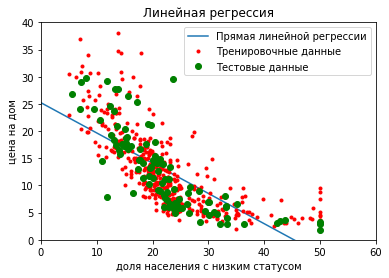

In [165]:
# построим график линейной регрессии

plt.xlabel('доля населения с низким статусом')
plt.ylabel('цена на дом')
plt.title('Линейная регрессия')

x = np.linspace(0,60,100)
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(x_train, y_train, 'r.')
plt.plot(x_test, y_test, 'go')
plt.xlim(0,60)
plt.ylim(0,40)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()


Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [176]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [167]:
data.info()

# в таблице 156 строк. 
#Не до конца заполнены: Positive affect, Negative affect, Social support, Freedom Corruption, Generosity, Log of GDP\nper capita, Healthy life
#expectancy 

#заполним пропуски нулями

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


Сколько стран в выборке? Написать ответ. 

In [188]:
data['Country (region)'].isnull().sum()

# в столбце нет пустых стран, заполнено 156 строк

0

In [192]:
print('Количество стран в выборке =', len(data['Country (region)']))

Количество стран в выборке = 156


In [193]:
#заполним пропуски нулями
data['Positive affect'].fillna(0, inplace = True)
data['Negative affect'].fillna(0, inplace = True)
data['Social support'].fillna(0, inplace = True)
data['Freedom'].fillna(0, inplace = True)
data['Corruption'].fillna(0, inplace = True)
data['Generosity'].fillna(0, inplace = True)
data['Log of GDP\nper capita'].fillna(0, inplace = True)
data['Healthy life\nexpectancy'].fillna(0, inplace = True)

#data.info()

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

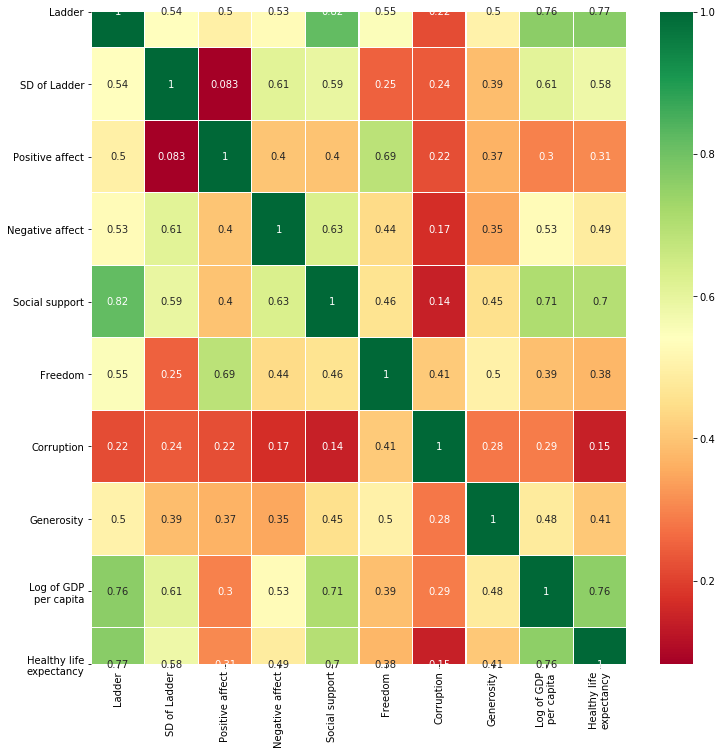

In [195]:
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(12,12)

In [ ]:
# ВЫВОДЫ из матрицы:
# мера удовлетворенности жизни зависит от ожидаемой продолжительности жизни (77% корреляции), от уровня ВВП, от соц. поддержки. ЧЕм выше эти показатели, тем выше мера удовлетворенности жизнью.
# позитивные эмоции зависят от свободы, правда уровень влияния слабый. Чем выше свобода, тем больше позитива
# Социальная поддержка зависит от ВВП (71% корреляции). Чем выше ВВП, тем больше соц поддержки. 
# Коррупция крайне слабо коррелирует с другими столбцами.Также, как и уровень щедрости.
# Ожидаемая продолжительность жизни зависит от ВВП (76% корреляции).

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

In [262]:
number_of_trials = 10  # 10 подбрасываний

list_of_values = np.random.randint(1, 6, number_of_trials)
print ('Кол-во подбрасываний =', number_of_trials, "раз.")
print('Выпавшие значения =', list_of_values)    

Кол-во подбрасываний = 10 раз.
Выпавшие значения = [1 5 4 4 1 5 4 2 1 3]


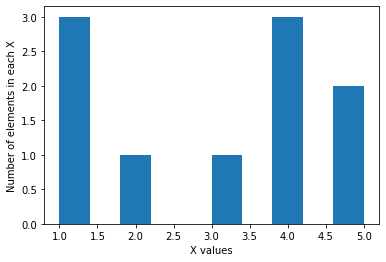

In [263]:
plt.hist(list_of_values, bins = 10)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

# Это дискретное распределение. Не относится к Бернулли, биномиальному и не геометрическое распределение, т.к. имеют 6 вариантов выпадения значений.

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

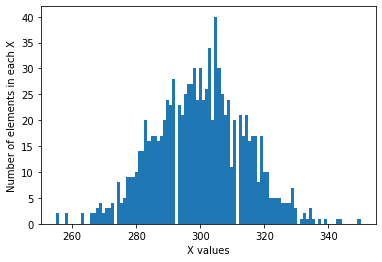

In [265]:
number_of_sums = 1000

# создаем массив из нулей
x_1 = np.zeros([number_of_sums])

# заполняем массив суммой из 100 бросков. и так 1000 раз
for i in range(number_of_sums):
    x_1[i] = np.sum(np.random.randint(1, 6, 100))
    
plt.hist(x_1, 100)

plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

# получился график с нормальным распределением. 
# Центральную предельную теорему можно применить,т.к. у нас имеется слабозависимые случайные величины.
# Которые мы сгенерировали 100 раз, сложили. Сделали так 1000 раз.
# И получаемое распределение получилось нормальным.